# Предсказание цены на подержанные автомобиль Ford

![](https://www.ford.com/cmslibs/content/dam/vdm_ford/live/en_us/ford/nameplate/f-150/2019/collections/billboard/3_2/19_FRD_F15_40813_SPORT_V2-167.jpg/_jcr_content/renditions/cq5dam.web.1280.1280.jpeg)

**Бизнес-постановка задачи**

Оценка подержанного автомобиля - это достаточно трудная задача, так как на стоимость влияют различные факторы, например, возраст автомобиля, его состояние, пробег и даже личное отношение продавца. Таким образом, цена подержанных автомобилей на рынке не является постоянной. И поскольку нет прозрачности в её образовании, а спрос растет ежегодно, у нечестных предпринимателей возникает стимул иррационально завышать цену. Модель для оценки стоимости подержанного автомобиля помогла бы покупателям не переплатить за желаемое авто, а честным продавцам быстро устанавливать цену, соответствующую их предложениям.

**Постановка задачи анализа данных**

Целью данной задачи является прогнозирование цены на подержанные автомобили Ford с помощью построения регрессионных моделей и их анализа. Набор данных состоит из информации о транспортных средствах, выставленных на продажу на сайте Craigslist. Данные опубликованы в открытом доступе на платформе Kaggle.

**Обзор доступных данных**

В выборке 4913 наблюдений и 12 характеристик для каждого из объектов (штат продажи, год выпуска, технические характеристики автомобиля, цена транспортного средства и т.д.). Пустые значения указывают на то, что о соответствующей характеристики нет информации. Выборка была разбита на две части для обучения и для тестирования модели.

Итак, данные содержат два типа переменных:

* Целевая: **price**
* Остальные переменные: **11 переменных, которые могут использоваться для прогноза целевой переменной.**

## План анализа данных (data mining):

  1. Загрузить данные для обучения
  2. Обработать данные перед обучением модели
  3. Обучить модель на обучающей выборке
  4. Загрузить и предобработать данные для тестирования
  5. Провалидировать модель на тестовой выборке

## 1. Загрузить данные для обучения

**Шаг 1.1. Загружаем библиотеки**

Библиотека **warnings** отвечает за то, какие предупреждения (warnings) о работе будут выводиться пользователю.
FutureWarning - предупреждения о том, как изменится работа библиотек в будущих версиях.
Поэтому такие предупреждения мы будем игнорировать.
Чтобы включить режим игнорирования мы отбираем все предупреждения из категории FutureWarning и выбираем для них действия 'ignore'.
Это делается вызовом функции simplefilter c задание двух атрибутов: действия action и категории предупреждений category.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



Для корректной работы с данными в python требуется загрузить специальную библиотеку
**pandas**, программную библиотеку на языке python для обработки и анализа данных.

In [ ]:
import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd

Для корректной работы с графиками в python требуется загрузить специальную библиотеку
**matplotlib**, программную библиотеку на языке python для визуализации данных двумерной и трехмерной графикой.

Графики используются для облегчения интерпретации полученных результатов, а также в качестве иллюстраций в презентациях и отчетах.

Оснвные методы для построения:
* plot() - графики
* semilogy() - график логарифметический
* hist() - гистограммы

In [ ]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt

# позволяет отображать графики прямо в ноутбуке
%matplotlib inline

**Шаг 1.2. Загрузим данные**



Для решения задачи мы будем использовать данные. Они состоят из двух частей: часть для обучения и часть для тестирования модели. Загружаем данные с помощие команды !wget. Для того, чтобы игнорировать сообщения в процессе загрузки используем магическую команду %%capture в первой строке.

In [ ]:
%%capture
!wget https://www.dropbox.com/s/bbm6rxqb4bsfl2d/training_data.xlsx
!wget https://www.dropbox.com/s/gjhur7eyzcv265y/test_data.xlsx

Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки pandas для загрузки таких данных **read_excel**.

В функции передаем один атрибут: название таблицы с данными.

In [ ]:
training_data = pd.read_excel('training_data.xlsx')

In [ ]:
training_data.head()

,Unnamed: 0,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,1071800,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,1458828,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,890437,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,463498,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,322774,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [ ]:
training_data = pd.read_excel('training_data.xlsx', usecols=lambda x: 'Unnamed' not in x) # загружаем таблицу в переменную training_data

*Что важно посмотреть после того, как мы загрузили данные?*
- проверить, что данные действительно загрузились
- посмотреть на данные, чтобы удостовериться, что они правильные: колонки имеют те же названия, что и в таблице и т.д.

Для того чтобы это сделать, нужно вызвать от переменной *training_data* метод **head()**, который выводит первые 5 строк таблицы.

Для вызова метода объекта необходимо сначала написать *имя объекта*, затем поставить *точку*, затем уже написать *название метода*. Обратите внимание, что в конце обязательно ставить скобочки, потому что метод - это функция и в ней есть аргументы, просто в данном случае мы их не передаем, поэтому оставляем поле пустым

In [ ]:
training_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


Ниже в таблице представлено описание каждого из 12 полей.

|Название поля 	 |Описание      	                              |Название поля   |Описание                                  |
|:--------------:|:----------------------------------------------:|:--------------:|:----------------------------------------:|
|**price**       |Цена                                            |**transmission**|Коробка передач                           |
|**year**        |Год производства 	                              |**drive**       |Привод                                    |
|**condition**   |Состояние        	                              |**size**        |Полноразмер или нет                       |
|**cylinders**   |Количество цлиндров 	                          |**lat**         |Широта 	                                  |
|**odometer**    |Пробег                                          |**long**        |Долгота  	                              |
|**title_status**|Легальный статус авто  (все документы в наличии)|**weather**     |Среднегодовая температура в городе продажи|


**Шаг 1.3. Посмотрим на размеры загруженной таблицы**, у которой мы видели только первые 5 строк.

Для этого вызываем поле **shape** у нашей переменной *training_data*. Поле вызывается также как метод, но в конце скобки не ставятся, так как для поля не предусмотрена передача аргументов.  

In [ ]:
training_data.shape

(4913, 12)

*Что означает первое и второе число?*

Итак, таблица содержит 4913 строк (объектов) и 12 столбцов (признаков), включая выходной (целевой) признак.

Таблицу проверили, теперь можно приступать к обработке данных.

# 2. Обработать данные перед обучением модели

<a href="https://drive.google.com/uc?id=1oBVbNi9xUsQObgLV0fA0oP4To5AbLc7j
" target="_blank"><img src="https://drive.google.com/uc?id=1oBVbNi9xUsQObgLV0fA0oP4To5AbLc7j"
alt="IMAGE ALT TEXT HERE" width="360" border="0" /></a>


**Шаг 2.1. Проверяем данные на наличие пропусков и типов переменных**

Начнем с проверки общей информации о данных.
Для того чтобы это сделать, нужно обратиться вызвать у переменной *training_data* метод **info()**.

Напомним, что в конце необходимо поставить скобочки.

In [ ]:
# 1.  TO DO
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4913 non-null   int64  
 1   year          4913 non-null   int64  
 2   condition     4913 non-null   int64  
 3   cylinders     4913 non-null   int64  
 4   odometer      4913 non-null   int64  
 5   title_status  4913 non-null   object 
 6   transmission  4913 non-null   object 
 7   drive         4651 non-null   object 
 8   size          3825 non-null   object 
 9   lat           4913 non-null   float64
 10  long          4913 non-null   float64
 11  weather       4801 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 460.7+ KB


Анализируем результата выполнения команды:

* 4913 строк (entries)
* 12 столбцов (Data columns)

В данных присутствует три типа dtypes:
* int64 - целое число  (5 столбцов)
* float64 - дробное число (3 столбца)
* object - не число, обычно текст (4 столбца)

В нашем случае признаки с типом object имеют текстовые значения.

Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Видно, что в данных содержатся пропуски, так как эти цифры не в каждой строчке совпадают с полным числом строк (4913).

**Шаг 2.2. Удаляем пропуски**

Как мы уже видели выше, в наших данных есть пропуски (значения NaN). Для удобства работы выкинем такие данные из нашего датасета, применив метод **dropna()** к *training_data*:

In [ ]:
# 2. TO DO
training_data.dropna(inplace=True)

Посмотрим на то, как изменились размеры таблички:

In [ ]:
training_data.shape

(3659, 12)

Также, после выкидывания строк с пропущенными значениями осталось 3659 строка из 4913. Нам повезло: наш набор данных был заполнен на 75%.

**Шаг 2.3. Отделяем текстовые признаки от числовых**

Мы видим, что некоторые характеристики представлены текстовыми значениями. Машине сложно обрабатывать текстовые признаки, поэтому для упрощения работы мы оставим столбцы, содержащие только числовые данные.   

Отметим, что, таким образом мы можем потерять довольно много информации (например, очевидно, что тип привода (признак drive)  влияет на стоимость), однако мы сознательно идем на это упрощение на данном этапе обучения.

Чтобы получить все числовые характеристики, необхдимо применить метод **_get_numeric_data()** к объекту *training_data*

In [ ]:
# 3. TO DO
training_data = training_data._get_numeric_data()

Посмотрим на данные еще раз. Теперь они содержат лишь числовые признаки.

In [ ]:
training_data.head()

,price,year,condition,cylinders,odometer,lat,long,weather
0,43900,2016,4,6,43500,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,45.518031,-122.578752,50.0


Итак, из 12 столбцов у нас осталось 8 числовых, 4 текстовых мы убрали.

Для числовых признаков можно построить гистограмму. Гистограмма - это способ графического представления табличных данных, благодаря которому можно увидеть распределение значений признака.

Для построения гистограммы необходимо вызвать метод **hist()** у объекта *training_data*. Желательно указать аргумент *figsize*, который устанавливает ожидаемый размер изображения. В нашем случае это (15,15).  

Заметим, что название переменной, по которой строится гистограмма, указано в названии графика.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'weather'}>, <Axes: >]], dtype=object)

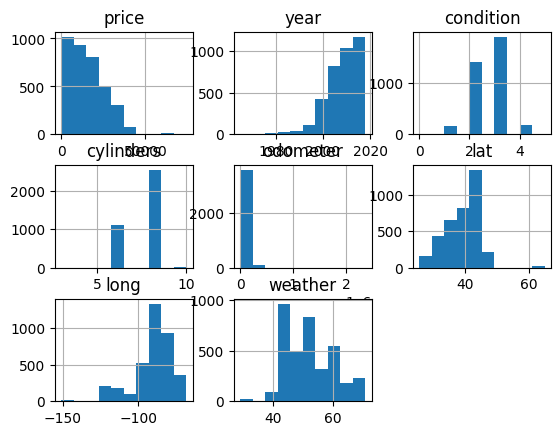

In [ ]:
# 4. TO DO
training_data.hist()

Например, рассмотрим признак cylinders. Из гистограммы видно, что у нас очень мало машин с четырьмя и десятью цилиндрами. Машин с шестью цилиндрами - 1500, и около 3500 машин с восемью цилиндрами.   

**Шаг 2.4. Работаем с целевой переменной**

*Какая переменная целевая?*

В данном случае по условию задачи мы должны прогнозировать стоимость автомобиля, поэтому целевая переменная - это price. Запишем название целевого признака в отдельную переменную с названием *target_variable_name*.

In [ ]:
target_variable_name = 'price'

Нам нужно выделить в отдельную переменную *training_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *training_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*.

In [ ]:
# 5. TO DO
training_values = training_data[target_variable_name]

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным.
Для это нужно у переменной *training_data* вызвать метод **drop()**. Результат мы записываем в новую переменную *training_points*. После выполнения запроса *training_points* будет содержать исходную таблицу без целевого столбца.

Обратите внимание, что в данном случае мы передаем два аргумента:
    1. target_variable_name - название столбца цены, который мы ранее записали в эту переменную и теперь хотим удалить из training_data
    2. axis=1 - означает, что мы удаляем столбец, а в случае axis=0 - означает, что мы удаляем строку

In [ ]:
# 6. TO DO
training_points = training_data.drop(target_variable_name, axis=1)

Можно посмотреть результаты этих действий, вызвав метод **head()** и поле **shape**, которыми мы пользовались ранее, но сейчас нужно вызывать их от новой переменной *training_points*.

In [ ]:
training_points.head()

,year,condition,cylinders,odometer,lat,long,weather
0,2016,4,6,43500,36.471500,-82.483400,59.0
1,2009,2,8,98131,40.468826,-74.281734,52.0
2,2002,2,8,201803,42.477134,-82.949564,45.0
3,2000,1,8,170305,40.764373,-82.349503,49.0
5,2003,3,8,167662,45.518031,-122.578752,50.0


In [ ]:
training_points.shape

(3659, 7)

Видно, что столбца действительно нет, а количество строк не изменилось. Данные в 5 первых строках такие же, как были ранее.

##   3. Обучить модель на обучающей выборке

![](https://raw.githubusercontent.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/master/ford_price.png)

**Шаг 3.1. Выбираем метод, который будем использовать**

Проще всего начать с простых методов.
Мы воспользуемся двумя методами для построения моделей и сравним их между собой:
* Линейная регрессия *linear regression*
* Лес решающих деревьев *random forest*

На выбор метода для построения модели влияет набор признаков, размер выборки, интуиция про то, какая связь между входными переменными и целевой. Но часто решение принимается исходя из того, какая модель сработала лучше.

Для корректной работы с методами построения моделей в python требуется загрузить специальную библиотеку
**sklearn**, программную библиотеку на языке python для для машинного обучения и анализа данных.

Мы импортируем два модуля из этой библиотеки:
 * *linear_model* - тут находятся все линейные модели
 * *ensemble* - тут находятся модели на основе ансамблей

In [ ]:
from sklearn import linear_model, ensemble

Прежде чем начать делать ремонт, нужно подготовить инструменты для работы. Аналогично в нашем случае, прежде чем обучать модели, нужно создать их прототипы.  

Чтобы создать модель линейной регресии, пишем имя модуля 'linear_model', затем точку, затем название модели.

Для этого нужно выполнить следующий код:

```python
linear_regression_model = linear_model.LinearRegression()
linear_regression_model
```

Результат выполнения должен быть следующим:

```python
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
```

In [ ]:
# 7. TO DO # создаем модель
linear_regression_model = linear_model.LinearRegression()

In [ ]:
# 8. TO DO # смотрим, что получилось
linear_regression_model

LinearRegression()

Чтобы создать модель случайного леса, пишем имя модуля ensemble, затем точку, затем название модели.

Для этого нужно выполнить следующий код:

```python
random_forest_model = ensemble.RandomForestRegressor()
random_forest_model
```
Результат выполнения должен быть следующим:
    
```python
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
```

Обратите внимание, что для воспроизводимости результата на разных компьютерах необходимо для всех зафиксировать один параметр random_state. Например, можно установить для него значение 42.

In [ ]:
# 9. TO DO
random_forest_model = ensemble.RandomForestRegressor(random_state=42)

У модели на основе случайного леса больше параметров. Рассмотрим наиболее важные:
* параметр *n_estimators* определяет, сколько деревьев в лесу,
* в параметре *max_depth* устанавливается, какая максимальная глубина у дерева,
* в параметре *min_samples_leaf* задается, какое максимальное число объектов может попасть в лист дерева.

Так как у модели на основе случайного решающего леса больше параметров, такая модель обычно обучается медленнее.
Кроме этого, на время обучения влияют значения параметров модели. Например, чем больше деревьев в лесе - тем дольше модель будет учиться.

**Шаг 3.2. Обучить модель**

Теперь, когда мы создали прототипы обеих моделей, можем их обучить с помощью обучающей выборки.

Для этого вызываем метод **fit()** у каждой модели и передаем ему на вход два аргумента:
таблицу входных признаков и столбец значений целевой переменной - (training_points, training_values)

In [ ]:
# 10. TO DO
linear_regression_model.fit(training_points, training_values)

LinearRegression()

Делаем тоже самое для модели решающего леса.

In [ ]:
# 11. TO DO
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(random_state=42)

* Для двух разных моделей в sklearn методы для обучения модели не отличаются.
* Мы получили две обученные модели.
* Теперь необходимо провалидировать модели на новых тестовых данных.

## 4. Загрузить и предобработать данные для тестирования

**Шаг 4.1. Загрузим и проанализируем тестовые данные.**

Так как данные в формате xlsx (Excel), мы будем использовать специальную функцию
из библиотеки pandas для загрузки таких данных **read_excel**.

В функции передаем один атрибут: название файла, в котором находится таблица с данными.

In [ ]:
test_data = pd.read_excel('test_data.xlsx', usecols=lambda x: 'Unnamed' not in x)

*Что важно посмотреть, после того, как мы загрузили данные?*

- проверить, что данные действительно загрузились
- посмотреть на данные, чтобы удостовериться, что они правильные: колонки имеют те же названия, что и в таблице и т.д.

Для того чтобы это сделать, нужно вызвать от переменной *test_data* метод **head()**, который выводит первые 5 строк таблицы.

Для вызова метода объекта необходимо сначала написать *имя объекта*, затем поставить *точку*, затем уже написать *название метода*. Обратите внимание, что в конце обязательно ставить скобочки, потому что метод - это функция и в ней есть аргументы, просто в данном случае мы их не передаем, поэтому оставляем поле пустым

In [ ]:
# 12. TO DO
test_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,5990,2004,4,8,210445,clean,automatic,4wd,full-size,38.731803,-90.073678,48.0
1,18995,2015,2,6,142282,clean,automatic,4wd,full-size,42.504823,-92.405569,47.0
2,23500,2012,3,6,100710,clean,automatic,4wd,full-size,36.060541,-95.795447,57.0
3,24988,2012,4,6,85572,clean,automatic,4wd,NaN,30.457703,-84.347448,65.0
4,20995,2014,3,6,157556,clean,automatic,NaN,full-size,42.701772,-89.008858,45.0


Посмотрим на размеры загруженной таблицы, так как мы видели только 5 строк

Для этого вызываем поле **shape** у нашей переменной *test_data*. Поле вызывается также как метод, но в конце скобки не ставятся (!), так как для поля не предусмотрена передача аргументов.  

In [ ]:
# 13. TO DO
test_data.shape

(2104, 12)

*Что означает первое и второе число?*
Таблица содержит 2104 строк (объектов) и 12 столбцов (признаков), включая выходной (целевой) признак. Также как в учебных данных до обучения.

Таблицу проверили, теперь можно приступать к обработке данных
Действуем аналогично тому, как делали с данными для обучения

Проверим, есть ли в данных пропуски. Для того чтобы это сделать, нужно обратиться вызвать у переменной *test_data* метод **info()**.

In [ ]:
# 14. TO DO
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2104 entries, 0 to 2103
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2104 non-null   int64  
 1   year          2104 non-null   int64  
 2   condition     2104 non-null   int64  
 3   cylinders     2104 non-null   int64  
 4   odometer      2104 non-null   int64  
 5   title_status  2104 non-null   object 
 6   transmission  2104 non-null   object 
 7   drive         1975 non-null   object 
 8   size          1628 non-null   object 
 9   lat           2104 non-null   float64
 10  long          2104 non-null   float64
 11  weather       2036 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 197.4+ KB


Цифры в каждой строчке обозначают количество заполненных (*non-null*) значений. Видно, что в данных содержатся пропуски, так как эти цифры не в каждой строчке совпадают с полным числом строк (2106).

Нам необходимо удалить пропуски. Для этого применяем метод dropna() к test_data:

In [ ]:
# 15. TO DO
test_data.dropna(inplace=True)

Также нам нужно получить все числовые характеристики, для этого необхдимо применить метод **_get_numeric_data()** к объекту *test_data*:

In [ ]:
# 16. TO DO
test_data = test_data._get_numeric_data()

**Шаг 4.2. Отделяем целевую переменную**

Нам нужно выделить в отдельную переменную *test_values* столбец из нашей таблицы, который соответствует определенной выше целевой переменной. Для этого мы у таблицы *test_data* в квадратных скобках указываем имя нужного столбца. В нашем случае это имя записано в переменной *target_variable_name*.

In [ ]:
# 17. TO DO
test_data_variable = "price"
test_values = test_data[target_variable_name]

Отделим входные переменные от выходной (целевой), чтобы можно было построить модель предсказания целевой переменной по входным.
Для это нужно у переменной *test_data* вызвать метод **drop()**. Результат мы записываем в новую переменную *test_points*. После выполнения запроса *test_points* будет содержать исходную таблицу без целевого столбца.

Обратите внимание, что в данном случае мы передаем два аргумента:
    1. target_variable_name - название столбца цены, который мы ранее записали в эту переменную и теперь хотим удалить из training_data
    2. axis=1 - означает, что мы удаляем столбец, а в случае axis=0 - означает, что мы удаляем строку

In [ ]:
# 18. TO DO
test_points = test_data.drop(test_data_variable, axis=1)

И проверяем результат записанный в test_points:

In [ ]:
test_points.head()

,year,condition,cylinders,odometer,lat,long,weather
0,2004,4,8,210445,38.731803,-90.073678,48.0
1,2015,2,6,142282,42.504823,-92.405569,47.0
2,2012,3,6,100710,36.060541,-95.795447,57.0
8,2013,3,6,108500,42.612400,-83.034500,45.0
9,2000,3,8,69600,32.832296,-97.169012,67.0


In [ ]:
test_points.shape

(1543, 7)

In [ ]:
list(test_points)==list(training_points)

True

Видно, что количество столбцов уменьшилось на один. Данные в 5 первых строках такие же, как были ранее.

# 5. Провалидировать модель на тестовой выборке

**Шаг 5.1. Сравнение моделей.**

Теперь мы готовы сравнить качество двух моделей! 😎

*1. Какая модель лучше?*

Получим прогнозы целевой переменной на тестовых данных для модели линейной регрессии м модели случайного леса.

Для этого вызовем у каждой модели метод **predict()**, в качестве аргумента передадим *test_points*.

In [ ]:
# 19. TO DO
test_predictions_linear = linear_regression_model.predict(test_points)

In [ ]:
# 20. TO DO
test_predictions_random_forest = random_forest_model.predict(test_points)

Качество регрессионных моделей оценим двумя способами:
1. Сравним визуально прогнозы с настоящими ценами (тестовые с предсказанием)
2. Сравним метрики качества

Визуализируем прогноз линейной модели и настоящие значения из тестовой выборки

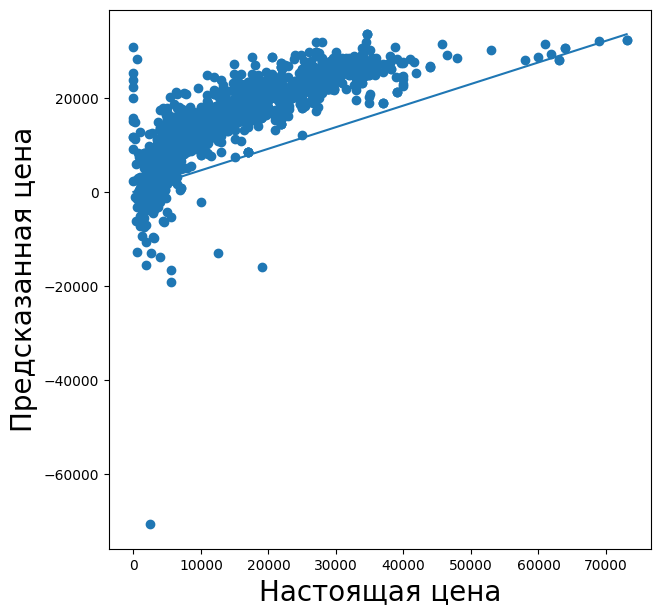

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_linear)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Визуализируем прогноз модели случайного леса и настоящие значения из тестовой выборки

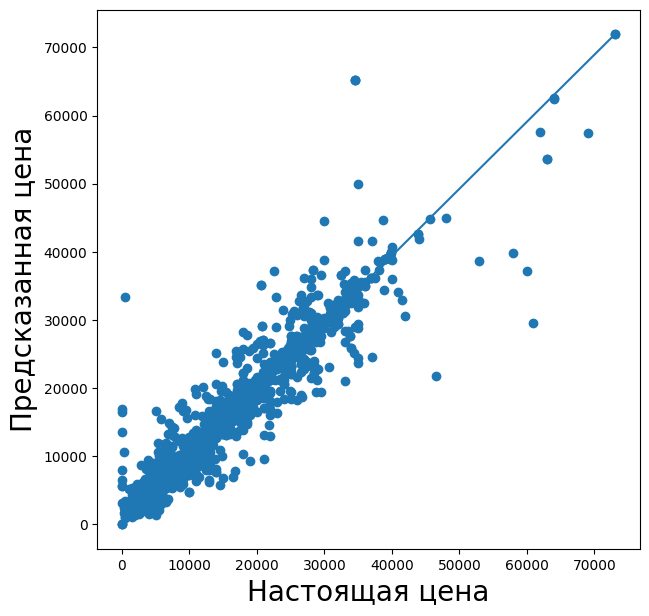

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_random_forest)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Кажется, что лучше сработала модель случайного леса, так как точки на втором изображении расположены вдоль диагонали. На первом изображении видно, что для высоких настоящих цен модель линейной регрессии дает существенно заниженный результат.

Проверим, так ли это с помощью **метрик качества регрессионной модели**

Для корректного подсчета метрик качества модели в python требуется загрузить их из библиотеки **sklearn**.

Мы используем две метрики качества:
 * *mean_absolute_error* - средняя абсолютная ошибка $|y_i - \hat{y}_i|$
 * *mean_squared_error* - средняя квадратичная ошибка $(y_i - \hat{y}_i)^2$
 * *RMSE* - корень из *mean_squared_error*

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Подсчитаем ошибки для линейной модели.

Для этого вызовем методы **mean_absolute_error()** и **mean_squared_error()**. На вход им передается столбец настоящих значений *test_values* и столбец значений, предсказанных моделью линейной регрессии *test_predictions_linear*.

In [ ]:
# 21. TO DO
mean_absolute_error_linear_model = mean_absolute_error(test_values, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_values, test_predictions_linear)

Подсчитаем ошибки для модели случайного леса.

Для этого вызовем методы **mean_absolute_error()** и **mean_squared_error()**. На вход им передается столбец настоящих значений *test_values* и столбец значений, предсказанных моделью линейной регрессии *test_predictions_random_forest*.

In [ ]:
# 22. TO DO
mean_absolute_error_random_forest_model = mean_absolute_error(test_values, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_values, test_predictions_random_forest)

Теперь напечатаем полученные ошибки.

In [ ]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model".format(
        mean_absolute_error(test_values, test_predictions_linear),
        mean_squared_error(test_values, test_predictions_linear)**0.5, mean_squared_error_linear_model))

print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest),
       mean_squared_error(test_values, test_predictions_random_forest)**0.5, mean_squared_error_random_forest_model))

MAE: 4485.56, RMSE: 6656.34, R2: 44306847.72 for linear model
MAE: 1828.15, RMSE: 3543.72,  R2: 12557936.57 for random forest model


Модель случайного леса работает лучше и визуально, и потому, что абсолютная и средне квадратичная ошибка меньше чем у линейной регресии.

Мы получили значения метрик ошибок наших моделей. Чтобы понять, насколько это нас утсраивает, важно взглянуть на исходный порядок цен на автомобили.
Видно, что средняя цена имеет порядок 20 000 долларов, что означает, что полученная ошибка может удовлетворять предъявляемым требованиям к модели регрессии.

# Обзор результатов

В этом ноутбуке мы научились
1. Определять наличие пропусков в данных
2. Избавляться от пропусков в данных
3. Строить гистограммы для возможных значений признаков

## 6. Бонус: Попробуем добавить в данные категориальные признаки?

Загрузим данные еще раз и выбросим строки с пропусками:

In [ ]:
training_data = pd.read_excel('training_data.xlsx')
training_data = training_data.drop('Unnamed: 0', axis = 1)
training_data = training_data.dropna()

test_data = pd.read_excel('test_data.xlsx')
test_data = test_data.drop('Unnamed: 0', axis = 1)
test_data = test_data.dropna()

Посмотрим, что все загрузилось правильно:

In [ ]:
training_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0


Категориальный признак - это такой признак, который может принимать одно значение из ограниченного числа возможных.

* В наших данных есть два *числовых* категориальных признаков: condition, cylinders

* И несколько *текстовых* категориальных признаков: title_status, transmission, drive, size.

Машине сложно обрабатывать текстовые признаки, поэтому нам необходимо закодировать их, то есть преобразовать в числовые.  

Например, для категориального поля `transmission` значения были из множества `["automatic", "manual", "other"]`. Мы изменим их на `["1", "2", "3"]` соответственно.

<a href="https://drive.google.com/uc?id=1G-FeQGfSRYMiWQCFBKj7x93IP8Hr_u_g
" target="_blank"><img src="https://drive.google.com/uc?id=1G-FeQGfSRYMiWQCFBKj7x93IP8Hr_u_g"
alt="IMAGE ALT TEXT HERE" width="360" border="0" /></a>

Пример кодирования для категориального признака Category, принимающего одно из четырех возможных значений ['Human', 'Penguin', 'Octopus', 'Alien'].

Для кодирования воспользуемся функцией **LabelEncoder()** из библиотеки **sklearn**.

Сначала её нужно импортировать:

In [ ]:
# 23. TO DO
from sklearn.preprocessing import LabelEncoder

Мы будем преобразовывать все текстовые категориальные признаки. Для удобства создадим отдельный список *text_categor_cols* с названиями признаков, которые мы хотим закодировать.

In [ ]:
text_categor_cols = ['title_status', 'transmission', 'drive', 'size']

Использование функции LabelEncoder() очень похоже на работу с моделями, которую мы демонстрировали выше. Прежде чем трансформировать текст в числа, необходимо создать прототип кодировщика.

Это делается следующим образом:

```python
le = LabelEncoder()
```

In [ ]:
# 24. TO DO
label_encoder = LabelEncoder()

Для того чтобы научить объект *label_encoder* кодировать один признак, нужно вызвать у него метод **fit_transform()** и в качестве аргумента передать значения признака. Как можно догадаться, этот метод состоит из двух частей: сначала *label_encoder* учится кодировать признак, то есть выполняет *fit*, затем применяет к нему полученную систему кодирования, выполняет *transform*. Так как тестовые данные нам нужно преобразовывать точно также, как и обучающие, то для тестовых признаков мы выполняем только *transform*. Для этого нужно вызвать у *label_encoder* метод **transform()** и в качестве аргумента передать значения признака из тестовой выборки.

Так как нам нужно закодировать сразу список признаков, мы будем делать это в цикле. Рассматриваем каждый текстовый признак из списка *text_categor_cols*, далее:
1. методу **fit_transform()** передаем в качестве аргумента этот признак у обучающей выборки
2. методу **transform()** передаем в качестве аргумента этот признак у тестовой выборки

К полученным числовым представлениям признака будем прибавлять единичку, чтобы кодирование начиналось с 1, а не с 0. Затем результат будем записывать в табличку.

In [ ]:
text_categor_cols = ['title_status', 'transmission', 'drive', 'size']

for col in text_categor_cols:
    training_data[col] = label_encoder.fit_transform(training_data[col]) + 1
    test_data[col] = label_encoder.transform(test_data[col]) + 1

In [ ]:
label_encoder.classes_

array(['compact', 'full-size', 'mid-size', 'sub-compact'], dtype=object)

Посмотрим на данные теперь:

In [ ]:
training_data.head(10)

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,1,1,1,2,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,1,1,1,2,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,1,1,1,2,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,4,1,1,2,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,1,1,1,2,45.518031,-122.578752,50.0
6,8995,2006,3,8,115500,1,1,3,2,43.592223,-96.787488,38.0
7,5995,2005,3,6,191198,1,1,3,2,38.611926,-121.423565,59.0
9,5500,2007,3,6,139913,1,2,3,2,31.782356,-96.088975,67.0
10,8900,2008,2,8,124600,4,1,1,2,40.538400,-82.806200,49.0
11,19680,2015,4,6,135150,1,1,1,2,37.167749,-113.415403,50.0


In [ ]:
training_data['drive'].value_counts()

drive
1    2681
3     930
2      48
Name: count, dtype: int64

Все текстовые переменные теперь преобразованы в числа.

Разделим данные на переменные и метки, как раньше:

In [ ]:
# 26. TO DO
features = training_data.drop(target_variable_name, axis=1).columns
X_train_le, y_train_le = training_data[features], training_data[target_variable_name]

features = test_data.drop(target_variable_name, axis=1).columns
X_test_le, y_test_le = test_data[features], test_data[target_variable_name]

Мы уже знаем, что на этих данных лучше работает модель случайного леса, поэтому теперь будем использовать только её.

In [ ]:
# 27. TO DO
random_forest_model = ensemble.RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_le, y_train_le)

RandomForestRegressor(random_state=42)

Теперь заставим модели предсказывать на тестовых данных, результат запишем в переменную *test_predictions_random_forest_le*:

In [ ]:
# 28. TO DO
test_predictions_random_forest_le = random_forest_model.predict(X_test_le)

Подсчитаем ошибку

In [ ]:
print('With using encoded text features')
print("MAE: {0:7.2f}, RMSE: {1:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest_le),
       mean_squared_error(test_values, test_predictions_random_forest_le)**0.5))

With using encoded text features
MAE: 1664.12, RMSE: 3329.96 for random forest model


Сравним со значениями без использования категориальных признаков (результат лежит в переменной *test_predictions_random_forest*):

In [ ]:
print('Using only numeric features')
print("MAE: {0:7.2f}, RMSE: {1:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest),
       mean_squared_error(test_values, test_predictions_random_forest)**0.5))

Using only numeric features
MAE: 1828.15, RMSE: 3543.72 for random forest model


Как видно, добавление текстовых закодированных признаков улучшило работу модели, так как значения метрик меньше.

Визуализируем прогноз модели случайного леса и настоящие значения из тестовой выборки с использованием текстовых признаков (синие точки) и без их использования (красные точки).

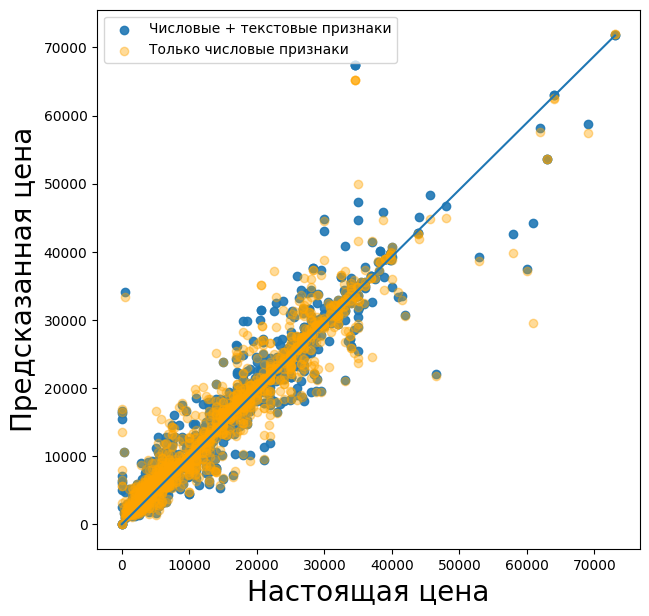

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, test_predictions_random_forest_le, alpha=0.9, label='Числовые + текстовые признаки');
plt.scatter(test_values, test_predictions_random_forest, color='orange', alpha=0.4, label='Только числовые признаки');
plt.plot([0, max(test_values)], [0, max(test_predictions_random_forest_le)]);

plt.legend()
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20);

Из графика видно, что мы стали лучше предсказывать стоимость автомобилей с высокой настоящей ценой.

## 7. Бонус*: One Hot Encoding.

Кодировать признаки можно по-разному, выше мы использовали лишь один простой вариант. Рассмотрим теперь более сложный способ, который называется One Hot Encoding.

Предположим, что некоторый признак может принимать n разных значений. Применив One Hot Encoding, мы создадим n признаков, все из которых для каждой строчки равны нулю за исключением одного. На позицию, соответствующую значению категории признака, мы помещаем 1.

Рассмотрим на уже знакомом примере. Пусть имеется категориальный признак Category, принимающий одно из четырех возможных значений ['Human', 'Penguin', 'Octopus', 'Alien']. После применения One Hot Encoding мы получим четыре новых признака (по количеству возможных значений) is_Human, is_Penguin, is_Octopus, is_Alien. Для той строчки, у которой в исходных данных стояла категория Human, в столбце is_Human будет стоять 1, в остальных столбцах 0. Аналогично для другого значения.  

<a href="https://drive.google.com/uc?id=1mBoRFNVQtcPdb31J8DaimQqywyfdI4a8
" target="_blank"><img src="https://drive.google.com/uc?id=1mBoRFNVQtcPdb31J8DaimQqywyfdI4a8"
alt="IMAGE ALT TEXT HERE" width="800" border="0" /></a>


Посмотрим, как изменится качество модели с кодированием признаков с помощью One Hot Encoding.

Загрузим данные еще раз и выбросим строки с пропусками:

In [ ]:
# 29. TO DO
training_data = pd.read_excel('training_data.xlsx')
training_data = training_data.drop('Unnamed: 0', axis = 1)
training_data = training_data.dropna()

test_data = pd.read_excel('test_data.xlsx')
test_data = test_data.drop('Unnamed: 0', axis = 1)
test_data = test_data.dropna()

Посмотрим, что все загрузилось правильно:

In [ ]:
training_data.head()

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0


Напомним, в наших данных есть следующие категориальные признаки: condition, cylinders, title_status, transmission, drive, size.

Метод **OneHotEncoder()** реализован в библиотеке sklearn.

Сначала его нужно импортировать:

In [ ]:
# 30. TO DO
from sklearn.preprocessing import OneHotEncoder

Мы будем преобразовывать все категориальные признаки. Для удобства создадим отдельный список *categor_cols* с названиями признаков, которые мы хотим закодировать, и *others_cols* с названиями остальных признаков.

In [ ]:
categor_cols = ['condition', 'cylinders', 'title_status', 'transmission', 'drive', 'size']
others_cols = ['price', 'year', 'odometer', 'lat', 'long', 'weather']

Действуем аналогично, как и при работе с LabelEncoder(). Прежде всего необходимо создать прототип кодировщка.

Для этого нужно выполнить следующее:

```python
one_hot_encoder = OneHotEncoder(sparce=False)
```

Аргумент **sparce** отвечает за то, в каком виде мы будем хранить значения после преобразования:
* в разреженном, **sparce=True**, то есть хранить только значения и местоположение ненулевых элементов. Этот вид нельзя вывести в виде таблички.
* в виде обычной матрицы, **sparce=False**. В этом случае мы можем легко посмотреть на получившийся результат.

In [ ]:
# 31. TO DO
one_hot_encoder = OneHotEncoder(sparse_output=False)

categor_columns_training = training_data[categor_cols]
others_columns_training = training_data[others_cols]
categor_columns_test = test_data[categor_cols]
others_columns_test = test_data[others_cols]

В отличии от LabelEncoder(), метод fit_transform() у OneHotEncoder() может принимать и обрабатывать сразу несколько признаков.

Отделим категориальные признаки от остальных у обучающей выборки и тестовой в отдельные таблички.

In [ ]:
# 32. TO DO
result_encoding_training = one_hot_encoder.fit_transform(categor_columns_training)
result_encoding_test = one_hot_encoder.transform(categor_columns_test)

Как и в случае с LabelEncoder(), нам необходимо применить метод **fit_transform()** к обучающей выборке, а метод **transform()** к тестовой.

In [ ]:
# 33. TO DO
result_encoding_training = pd.DataFrame(result_encoding_training, index=training_data.index)
result_encoding_test = pd.DataFrame(result_encoding_test, index=test_data.index)

Полученные результаты преобразуем в табличку, для этого в библиотеке  **pandas** есть функция **DataFrame()**. Мы передадим этой функции два аргумента:
* значения, которыми мы хотим заполнить табличку, то есть наши преобразованные признаки
* набор индексов, в нашем случае мы используем те же самые индексы, что и в обучающей/тестовой выборке

In [ ]:
# 35. TO DO
df_training = pd.DataFrame(result_encoding_training, index=training_data.index)
df_test = pd.DataFrame(result_encoding_test, index=test_data.index)


Соединим в одну табличку новые преобразованные признаки (*result_encoding_training* и *result_encoding_test*) с остальными признаками (*others_columns_training* и *others_columns_test* соответственно).


Вспомним, что выше мы записывали преобразованные значения в таблички с теми же индексами, что шли объекты в исходных данных. Мы делали это как раз для того, чтобы сейчас было легко "поставить" две таблички рядом. Чтобы объединить таблички используем функцию **concat()** из библиотеки **pandas**. Данная функция позволяет объединять таблички вдоль разных осей с набором дополнительной логики. В нашем случае мы просто хотим соединить таблички по индексам. Для этого в функцию **concat()** передаем два аргумента:
* в квадратных скобках "левую" и "правую" таблицы, которые мы хотим объединить. Например, для обучающей выборки [others_columns_training, result_encoding_training]
* **axis=1**, который указывает функции, что соединять необходимо по пересечениям индексов

In [ ]:
# 36. TO DO
training_data = pd.concat([others_columns_training, df_training], axis=1)
test_data = pd.concat([others_columns_test, df_test], axis=1)

training_data.columns = training_data.columns.astype(str)
test_data.columns = test_data.columns.astype(str)

Разделим данные на переменные и метки, как раньше (имя целевой переменной лежит в *target_variable_name*):

In [ ]:
# 37. TO DO
target_variable_name = 'price'

features = training_data.drop(target_variable_name, axis=1).columns
X_train, y_train = training_data[features], training_data[target_variable_name]

features = test_data.drop(target_variable_name, axis=1).columns
X_test, y_test = test_data[features], test_data[target_variable_name]

Обучим модель случайного леса

In [ ]:
# 38. TO DO
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
training_points.shape

(3659, 7)

Теперь заставим модели предсказывать на тестовых данных. Запишем результат в новую переменную *test_predictions_random_forest_ohe*, чтобы сравнить результат работы этой модели с предыдушими.

In [ ]:
# 39. TO DO
test_predictions_random_forest_ohe = random_forest_model.predict(X_test)

Подсчитаем ошибку

In [ ]:
print('With using One Hot Encoding')
print("MAE: {0:7.2f}, RMSE: {1:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest_ohe),
       mean_squared_error(test_values, test_predictions_random_forest_ohe)**0.5))

With using One Hot Encoding
MAE: 1669.77, RMSE: 3345.15 for random forest model


Сравним с предыдущеми результатами:

In [ ]:
print('Using only numeric features')
print("MAE: {0:7.2f}, RMSE: {1:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest),
       mean_squared_error(test_values, test_predictions_random_forest)**0.5))

Using only numeric features
MAE: 1828.15, RMSE: 3543.72 for random forest model


In [ ]:
print('With using Label Encoding')
print("MAE: {0:7.2f}, RMSE: {1:7.2f} for random forest model".format(
       mean_absolute_error(test_values, test_predictions_random_forest_le),
       mean_squared_error(test_values, test_predictions_random_forest_le)**0.5))

With using Label Encoding
MAE: 1664.12, RMSE: 3329.96 for random forest model


Новый способ преобразования признаков позволил улучшить качество модели: значения метрик качества выросли.